<h2>Title of the project 1: <b>Sales Data Analysis</b></h2>
<hr> 
<h3>Problem Statement</h3>
<u>Purpose:</u> Analyze sales data to identify trends, top-selling products, and revenue metrics for business decision-making.<br>
<u>Description:</u> In this project, you will dive into a large sales dataset to extract valuable insights. You will explore sales trends over time, identify the best-selling products, calculate revenue metrics such as total sales and profit margins, and create visualizations to present your findings effectively. This project showcases your ability to manipulate and derive insights from large datasets, enabling you to make data-driven recommendations for optimizing sales strategies.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Load the CSV data into a pandas DataFrame
sales_data = pd.read_csv('Sales Data.csv')
# Print out the first few rows of the DataFrame to see what it looks like
sales_data.head(5)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [12]:
# as the first column has no name giving it a name
sales_data = sales_data.drop(sales_data.columns[0], axis=1)
sales_data.columns.name = 'Serial Number'

# Convert 'Order Date' column to datetime format
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])

sales_data.head(5)


Serial Number,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
Name: Quantity Ordered, dtype: int64


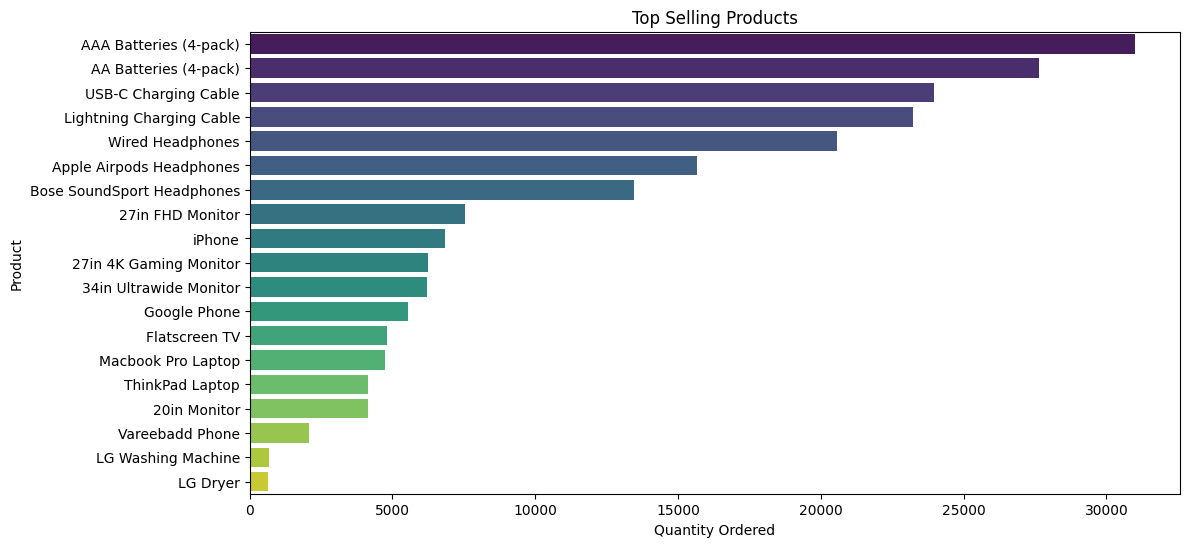

In [15]:
# Extract month and hour from 'Order Date'
sales_data['Month'] = sales_data['Order Date'].dt.month
sales_data['Hour'] = sales_data['Order Date'].dt.hour

# Identify top-selling products
top_products = sales_data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)
print(top_products.head(10))

# Plot top-selling products
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.xlabel('Quantity Ordered')
plt.ylabel('Product')
plt.title('Top Selling Products')
plt.show()

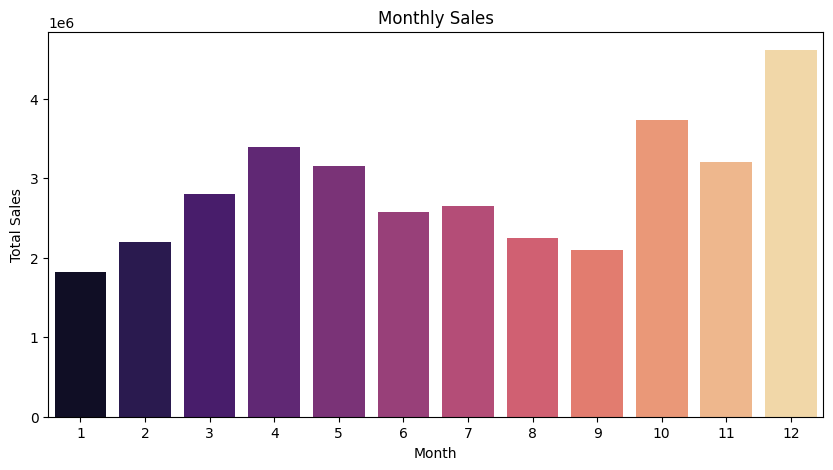

In [16]:
# Calculate total sales per month
monthly_sales = sales_data.groupby('Month')['Sales'].sum()

# Plot monthly sales
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='magma')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales')
plt.show()

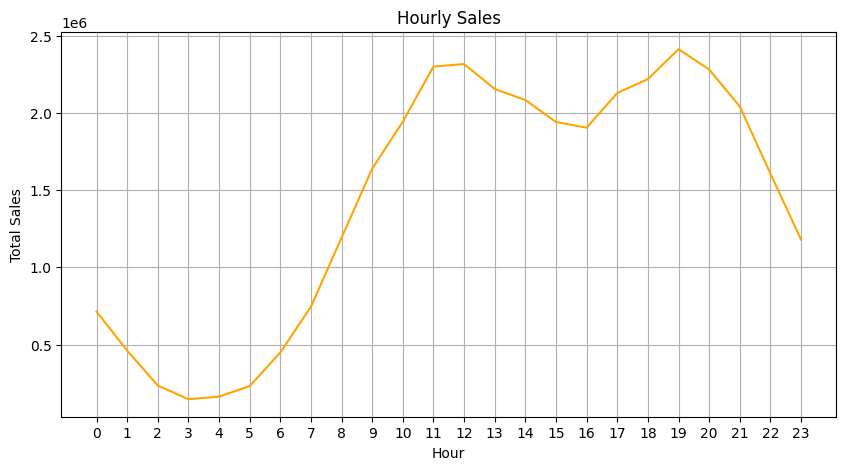

In [17]:
# Calculate hourly sales
hourly_sales = sales_data.groupby('Hour')['Sales'].sum()

# Plot hourly sales
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, color='orange')
plt.xlabel('Hour')
plt.ylabel('Total Sales')
plt.title('Hourly Sales')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()